# **프로그래밍과제 01: Facial Landmark Dataset**

잘 알려진 얼굴 랜드마크 데이터셋의 하나인 Helen Dataset으로부터 Dataset 객체와 Dataloader를 정의하고 생성한다.


1. 먼저 데이터셋 [홈페이지](http://www.ifp.illinois.edu/~vuongle2/helen/)에서 데이터셋을 다운로드한다. 홈페이지의 `3.b`와 `3.c`에 링크된 모든 파일들을 다운로드한다. `3.a`의 파일들을 다운로드할 필요는 없다.

2. 4개의 `zip` 파일(`train_1.zip`, `train_2.zip`, `train_3.zip`, `train_4.zip`)로 나뉘어져있는 `train` 이미지들을 압축해제하여 모두 `helen/train` 이라는 이름의 디렉토리에 모아서 저장한다. 트레이닝 이미지는 총 2000장이다.

3. 테스크이미지 `test.zip`은 `helen/test`라는 이름의 디렉토리에 압축을 해제하여 저장한다. 테스트 이미지는 330장이다.

4. `annotation.zip` 파일은 압축을 해제하여 `helen/annotation` 이라는 이름의 디렉토리에 저장한다. `1.txt`에서 `2330.txt`까지 총 2330개의 텍스트파일이다. 이중 1번에서 2000번까지는 트레이닝 이미지에 대한 주석이고, 나머지는 테스트 이미지에 대한 주석이다.

5. `trainnames.txt`와 `testnames.txt` 파일은 `helen` 디렉토리에 저장한다.


In [243]:
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
import random

**문제 1:** 커스텀 데이터셋 클래스 `HelenDataSet`을 작성하라. `__getitem__` 메서드는 이미지와 랜드마크의 딕셔너리를 반환하도록 구현하라. 아래의 코드 예와 같이 트레인 데이터셋과 테스트 데이터셋을 생성할 수 있어야 한다.

In [244]:
class HelenDataSet(Dataset):
    # YOUR CODE HERE






In [245]:
# 데이터 디렉토리는 이 노트북 파일과 동일한 디렉토리에 위치한다고 가정한다.
root_dir = './helen'
train_set = HelenDataSet(root_dir=root_dir, partition='train', transform=None)
test_set = HelenDataSet(root_dir=root_dir, partition='test', transform=None)

In [246]:
def show_landmarks(image, landmarks):
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.show()

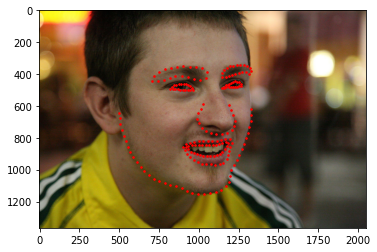

In [247]:
train_sample = train_set[99]
show_landmarks(train_sample['image'], train_sample['landmarks'])

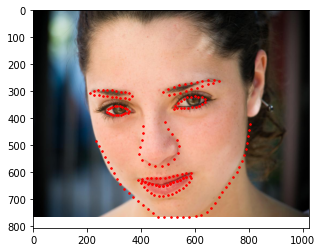

In [248]:
test_sample = test_set[89]
show_landmarks(test_sample['image'], test_sample['landmarks'])

**문제 2:** 이미지와 랜드마크 데이터의 전처리를 위한 세 개의 클래스 `MyReScale`, `MyRandomCrop`, 그리고 `MyRandomHorizontalFlip`을 작성하라. 세 클래스는 아래의 코드 예제와 같은 방식으로 사용할 수 있어야 한다. `MyRandomHorizontalFlip`은 1/2의 확률로 이미지를 수평적으로 플립한다.

In [249]:
class MyRescale(object):
    # YOUR CODE HERE



In [250]:
class MyRandomCrop(object):
    # YOUR CODE HERE



In [251]:
class MyRandomHorizontalFlip(object):
    # YOUR CODE HERE



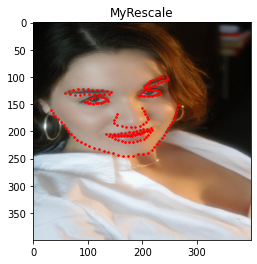

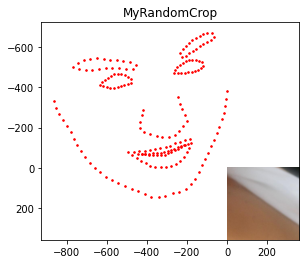

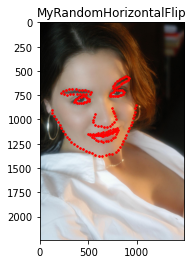

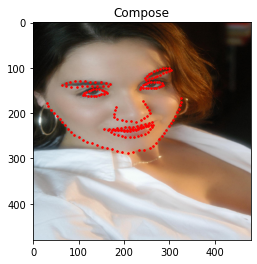

In [252]:
scale = MyRescale((400, 400))
crop = MyRandomCrop((360, 360))
flip = MyRandomHorizontalFlip()
composed = transforms.Compose([MyRescale((512, 512)),
                               MyRandomCrop((480, 480)),
                               MyRandomHorizontalFlip()])

# Apply each of the above transforms on sample.
sample = train_set[22]
for i, tsfrm in enumerate([scale, crop, flip, composed]):
    transformed_sample = tsfrm(sample)
    plt.title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

In [253]:
class MyToTensor(object):
    def __init__(self):
        self.img_tensorfier = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) ])

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
        image = self.img_tensorfier(image)
        return {'image': image,
                'landmarks': torch.from_numpy(landmarks)}

**문제 3:** `MyRescale`, `MyRandomCrop`, `MyRandomHorizontalFlip`, 그리고 `MyToTensor` 변환이 적용된 트레인 데이터셋 객체 `transformed_train_dataset`을 생성하라. 이때 먼저 이미지를 `(524, 524)` 크기로 resize하고, 이어서 `(512, 512)` 크기로 랜덤 크롭하라. 그런 다음 랜덤 플립을 하고, 마지막에 `MyToTensor` 변환을 적용한다. 또한 `MyRescale`과 `MyToTensor` 변환만이 적용된 테스트 데이터셋 객체 `transformed_test_dataset`을 생성하라. 이미지는 `(512, 512)` 크기로 resize한다.

In [254]:
# YOUR CODE HERE



In [255]:
batch_size = 4
train_dataloader = DataLoader(transformed_train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
test_dataloader = DataLoader(transformed_test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

**문제 4:** 데이터로더로 부터 추출된 하나의 배치(batch)를 받아서 4장의 이미지와 landmark를 아래의 실행 예와 같이 디스플레이하는 함수 `show_batch`를 작성하라. 위에 있는 `show_landmarks` 함수를 호출해도 사용해도 무방하다.

In [256]:
def show_batch(sample_batch):
    # YOUR CODE HERE




torch.Size([4, 3, 512, 512]) torch.Size([4, 194, 2])


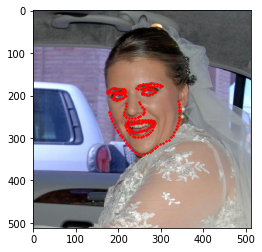

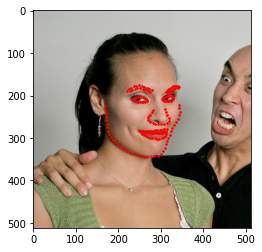

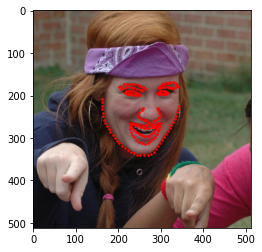

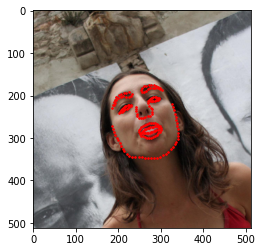

In [257]:
for sample_batch in train_dataloader:
    print(sample_batch['image'].size(), sample_batch['landmarks'].size())
    show_batch(sample_batch)
    break

torch.Size([4, 3, 512, 512]) torch.Size([4, 194, 2])


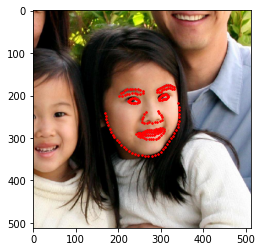

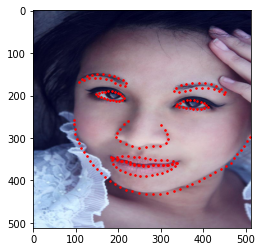

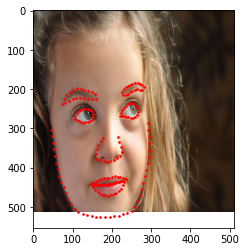

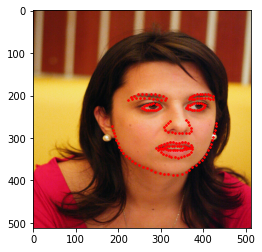

In [258]:
for sample_batch in test_dataloader:
    print(sample_batch['image'].size(), sample_batch['landmarks'].size())
    show_batch(sample_batch)
    break